In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()


In [10]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTSS-TcErkXNk8KB0AlijhitwetxeHD2M3R0HJl2QPMAyFq0fxFX4PFKnzAWLDnratIz67DNL6GsZnV/pub?output=csv"
df = pd.read_csv(url)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [12]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


<Axes: xlabel='type', ylabel='count'>

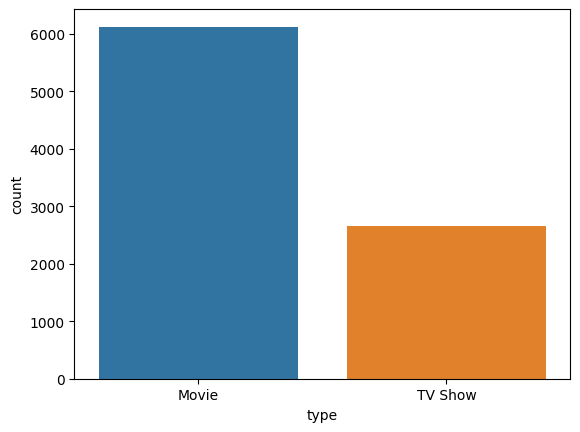

In [14]:
sns.countplot(x = 'type',data= df)

<Axes: ylabel='Frequency'>

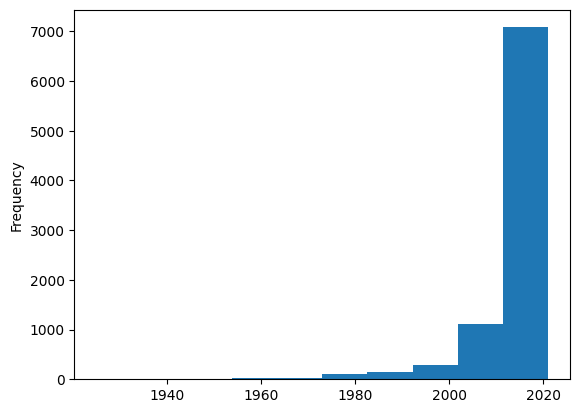

In [15]:
df['release_year'].plot.hist()

<Axes: xlabel='release_year', ylabel='count'>

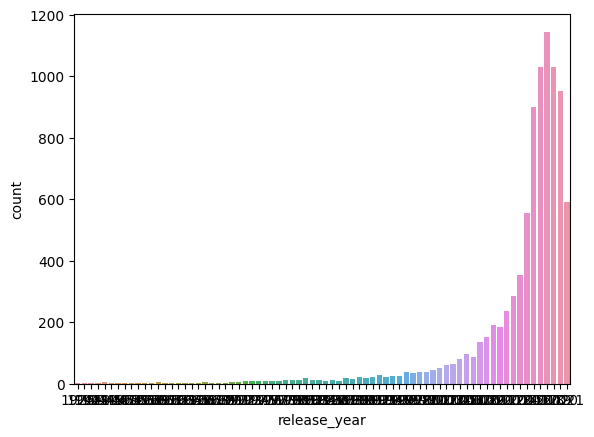

In [16]:
sns.countplot(data=df, x='release_year')

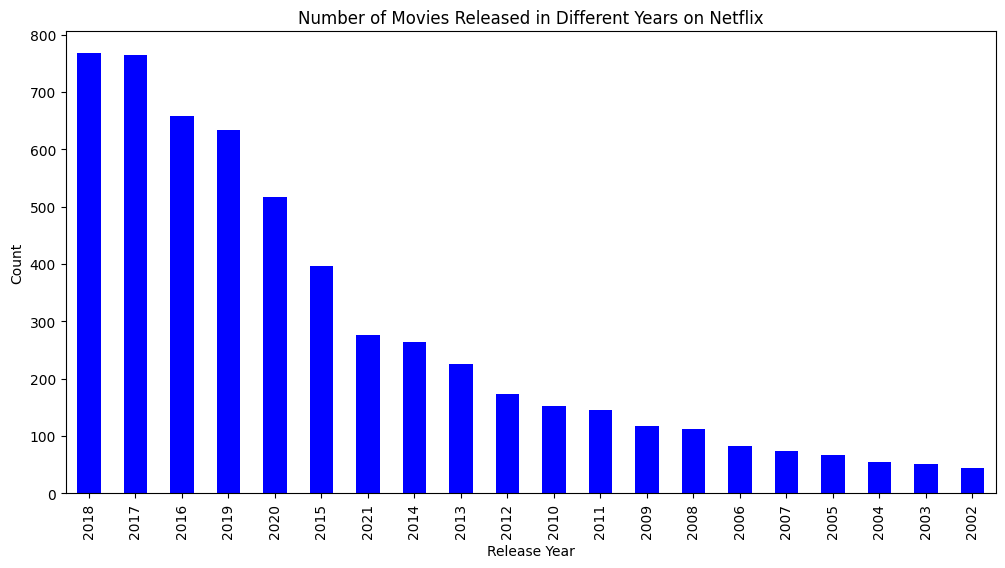

In [22]:
movie_counts = df[df["type"] == "Movie"]["release_year"].value_counts()[:20]

plt.figure(figsize=(12, 6))
movie_counts.plot(kind="bar", color="blue")
plt.title("Number of Movies Released in Different Years on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

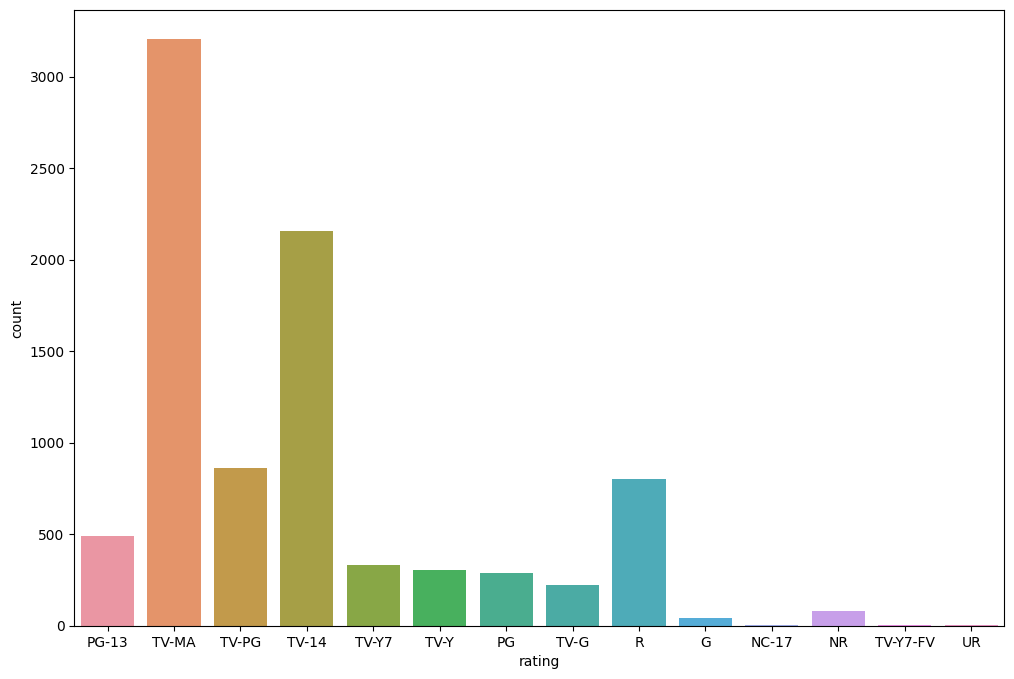

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df)
plt.show()

<Axes: xlabel='release_year'>

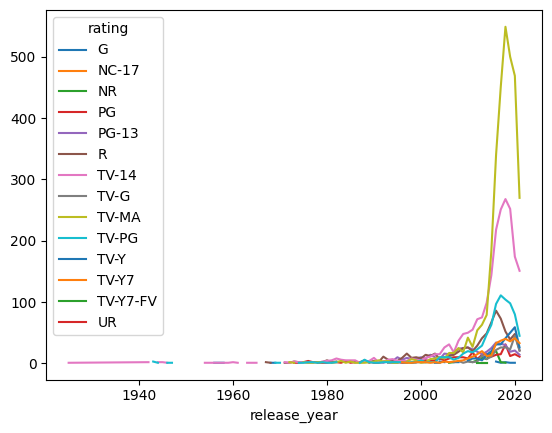

In [27]:
df.groupby('release_year')['rating'].value_counts().unstack().plot()

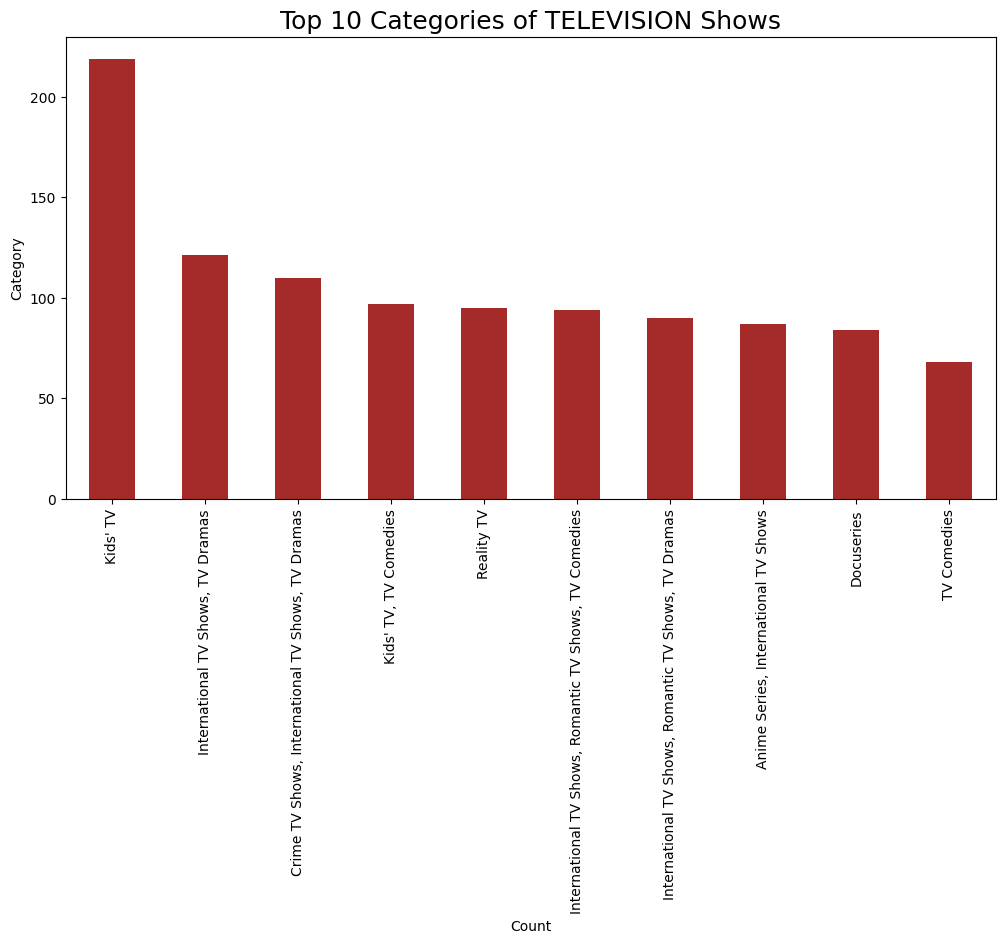

In [32]:
tv_show_category_counts = df[df["type"] == "TV Show"]["listed_in"].value_counts()[:10]

plt.figure(figsize=(12, 6))
tv_show_category_counts.plot(kind="bar", color="brown")
plt.title("Top 10 Categories of TELEVISION Shows", size=18)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

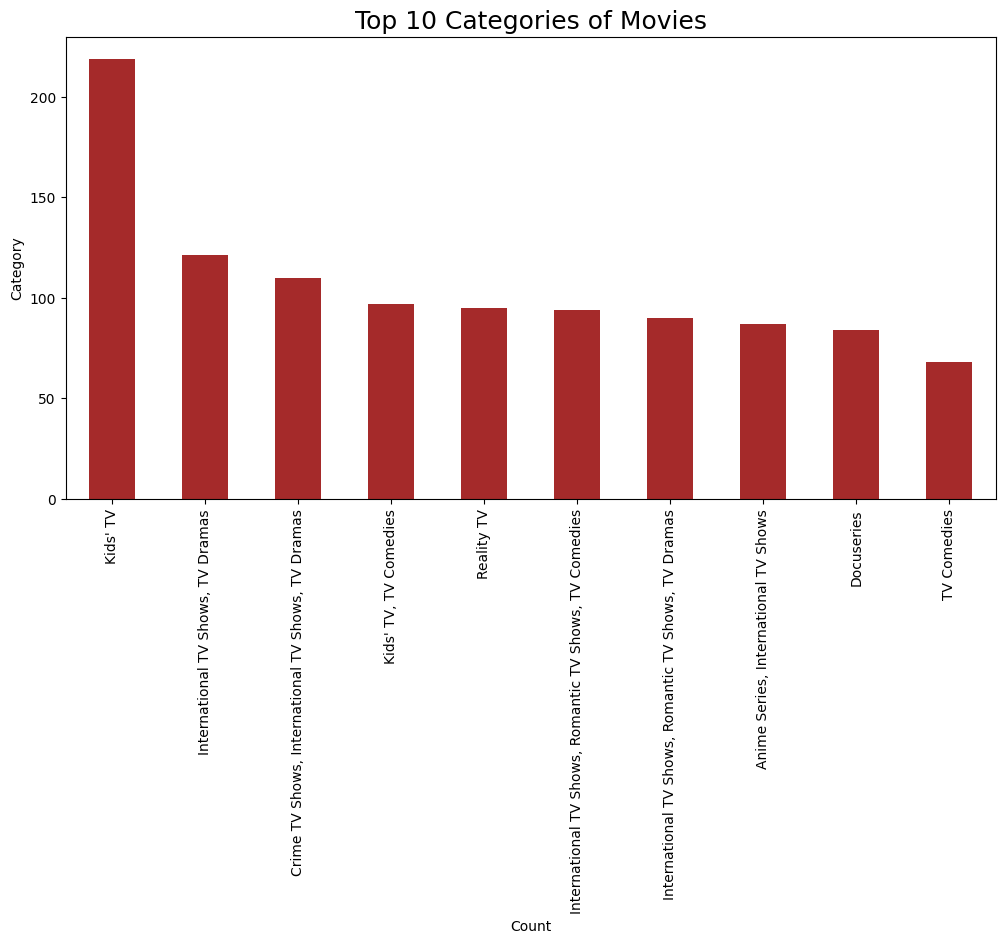

In [33]:
movie_category_counts = df[df["type"] == "Movie"]["listed_in"].value_counts()[:10]

plt.figure(figsize=(12, 6))
tv_show_category_counts.plot(kind="bar", color="brown")
plt.title("Top 10 Categories of Movies", size=18)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()